<a href="https://www.kaggle.com/code/mandarmo/titanic-data-analysis?scriptVersionId=222996714" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/Mandar-ai/Titanic-Data-Analysis/blob/main/Titanic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path to dataset files: /kaggle/input/titanic-dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4          

<ipython-input-1-f68a83275ae2>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-f68a83275ae2>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

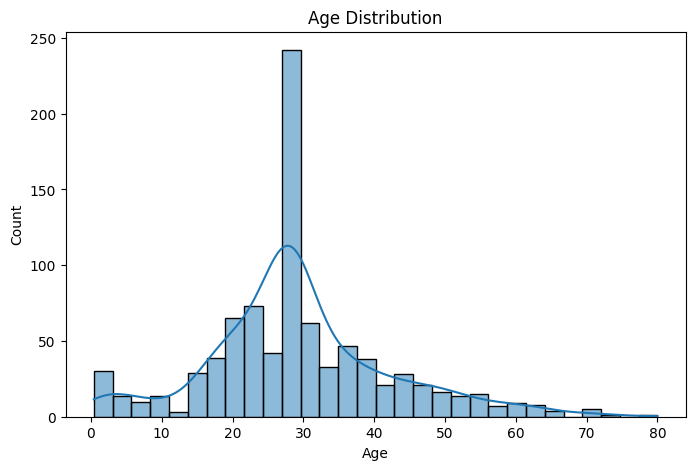

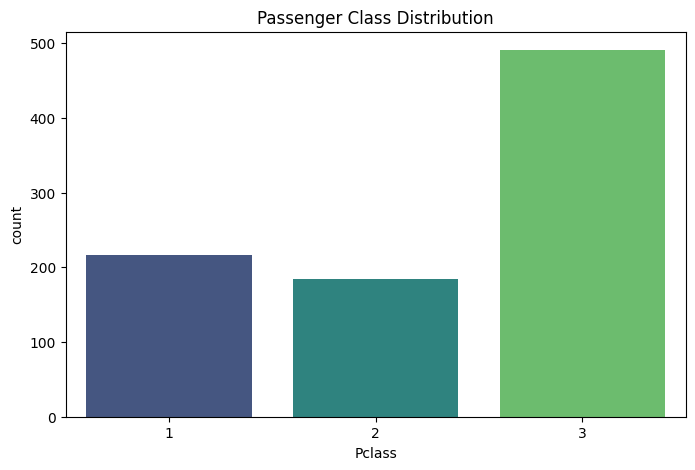

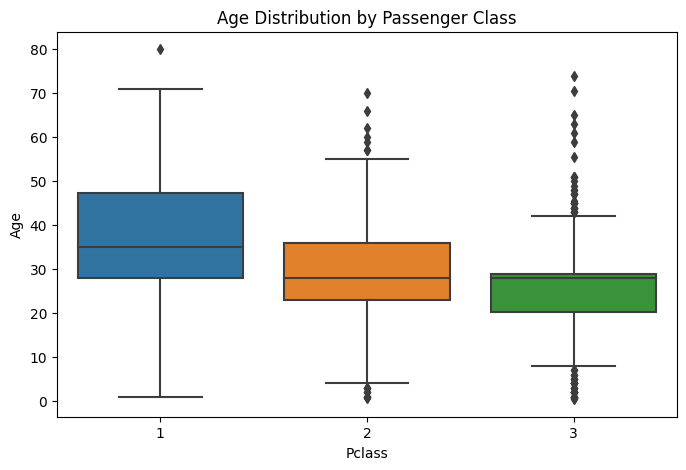

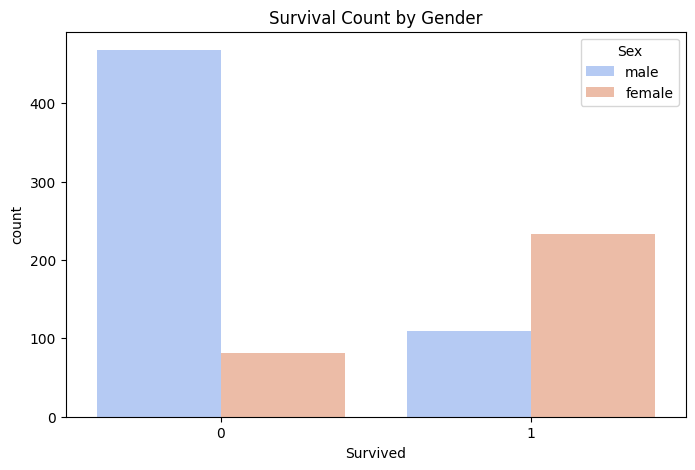

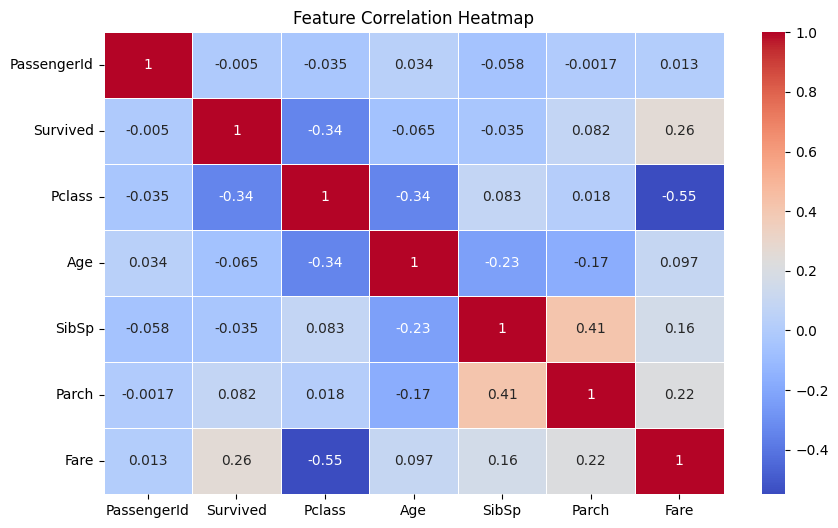

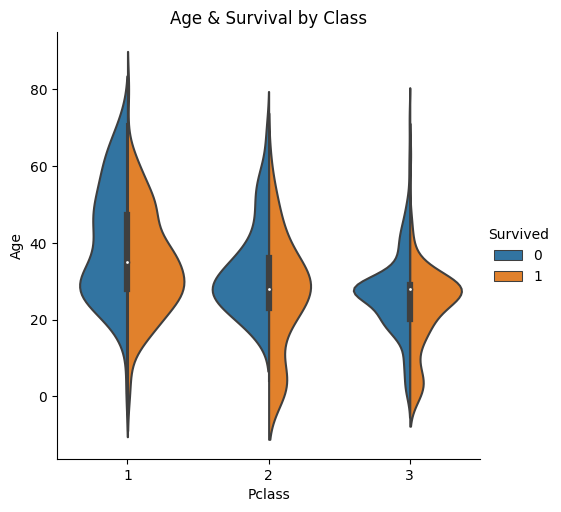

Key Insights:
1. Women and children had higher survival rates.
2. First-class passengers had significantly higher survival odds.
3. Younger passengers and those paying higher fares had better chances of survival.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

# Download latest version
dataset_path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", dataset_path)

# Find the CSV file within the downloaded dataset directory
for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break  # Stop after finding the first CSV file

# Load the dataset into a pandas DataFrame called 'df'
df = pd.read_csv(csv_file_path)

# Display dataset info
df.info()
print(df.head())

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Too many missing values

# Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title("Passenger Class Distribution")
plt.show()

# Bivariate Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age Distribution by Passenger Class")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title("Survival Count by Gender")
plt.show()

# Correlation Analysis
corr_matrix = df.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Multivariate Analysis
sns.catplot(x="Pclass", y="Age", hue="Survived", data=df, kind="violin", split=True)
plt.title("Age & Survival by Class")
plt.show()

# Business Insights
print("Key Insights:")
print("1. Women and children had higher survival rates.")
print("2. First-class passengers had significantly higher survival odds.")
print("3. Younger passengers and those paying higher fares had better chances of survival.")
